# Homework 04

## Due Thursday, March 3st

## Emily Mason

For all of the plots, make sure that you use labels with units as appropriate, and make good choices about all of the plot characteristics like fontsize, colors, and markersize. Choose colormaps that are appropriate for your data; that is, sequential for sequential data or diverging for diverging data. Don't use the default jet (rainbow) colormap!

In [31]:
import numpy as np
% matplotlib inline
import matplotlib.pyplot as plt
import glob
from datetime import datetime
import matplotlib.dates
from datetime import timedelta
import matplotlib.dates as mdates

### 1. Basic Line Plotting

Reproduce this image, showing river flow during flood years of the Merrimack River

![Merrimack River Discharge](merrimack_discharge.png)

The data used to create this plot can be found [un t](../data/merrimack_discharge.dat). You may read in the data any way you want. That is, you may extract the data for the years in question by hand, however part of your grade will be based on creating a flexible script that could read in values from another datafile, e.g., from another river gauge. Pay attention to detail.

   - *Undergraduates*: Focus only on the four lines representing river flow in the four specific years (1936, 1938, 1960, 1987).
   - *Graduates*: Do the undergrad work, and then add the black line representing the mean discharge (calculated from the data in the file), and the shaded region representing one standard deviation from the mean.

In [2]:
# Problem 1 solution... this is so long and I'm sorry in advance.


class discharge_data2(object):
    
    ''' Returns information in format of USGS merrimack river
        flow:
        
        Inputs:
                files: Path to USGS file
                cde  : Agency code, marked before each data value
        
        Outputs: (For all methods)
                site_ste: The site number [list]
                date_ste: A datetime object with (year,month,day)
                            of observation [list]
                dv_ste  : Flow in cubic-meters [array]
                qual_ste: The quality flag associated with data point.
                          If no quality flag exists, data point is
                          filled with 0 for purposes of easy transition
                          to an array. [list]
                          
        Methods and input:
                
                site_no:
                        ste: string of site number
                dv_dt_year:
                        dte: string of desired year
                qual_flag:
                        qual: string of desired quality flag
                dv_greater:
                        dvv: string of minimum value desired'''
    
    
    def __init__(self, files,cde):
        
        ''' Opens files and appends those matching agency code'''
        f = open(files)
        dat=[]
        for lines in f.readlines():
            line=lines.split()
            if line [0] == cde:
                dat.append(lines)
        self.data = dat
        f.close()
    
    def site_no(self,ste):
        ''' Takes open files and fines site number match'''
        site_ste = []
        dv_ste = []
        date_ste = []
        qual_ste = []
        for lines in self.data:
            line=lines.split()
            if line [1] == ste:
                site_ste.append(lines.split()[1])
                year = int(lines.split()[2].split('-')[0])
                month = int(lines.split()[2].split('-')[1])
                day = int(lines.split()[2].split('-')[2])
                date_ste.append(datetime(year,month,day))
                dv_ste.append(lines.split()[3]/35.5)
                if len(lines.split()) > 4:
                    qual_ste = lines.split()[4]
                else:
                    qual_ste = 0
        return site_ste,date_ls,np.array(dv_ste),qual_ste 
    
    def dv_dt_year(self,dte):
        '''Takes open file and finds date match via year'''
        site_ste = []
        dv_ste   = []
        date_ste = []
        qual_ste = []
        for lines in self.data:
            line=lines.split()
            li = line[2].split('-')
            if li [0] != dte:
                continue
            else:
                site_ste.append(lines.split()[1])
                year = int(lines.split()[2].split('-')[0])
                month = int(lines.split()[2].split('-')[1])
                day = int(lines.split()[2].split('-')[2])
                date_ste.append(datetime(year,month,day))
                dv_ste.append(float(lines.split()[3])/35.5)
                if len(lines.split()) > 4:
                    qual_ste = lines.split()[4]
                else:
                    qual_ste = 0
        return site_ste,date_ste,np.array(dv_ste),qual_ste 
    
    def qual_flag(self,qual):
        '''Takes quality flag and finds data matching quality flag'''
        site_ste = []
        dv_ste   = []
        date_ste = []
        qual_ste = []
        for lines in self.data:
            line=lines.split()
            if len(line) > 4:
                if line[4] != qual:
                    continue
                else:
                    site_ste.append(lines.split()[1])
                    year = int(lines.split()[2].split('-')[0])
                    month = int(lines.split()[2].split('-')[1])
                    day = int(lines.split()[2].split('-')[2])
                    date_ste.append(datetime(year,month,day))
                    dv_ste.append(float(lines.split()[3])/35.5)
                    qual_ste = lines.split()[4]
            else:
                continue
        return site_ste,date_ste,np.array(dv_ste),qual_ste 

    def dv_greater(self,dvv):
        ''' takes  data and searches for discharge values greater than
            some minimum value, dvv'''
        site_ste = []
        dv_ste = []
        date_ste = []
        qual_ste = []
        for lines in self.data:
            line=lines.split()
            if line [1] < dvv:
                continue
            else:
                site_ste.append(lines.split()[1])
                year = int(lines.split()[2].split('-')[0])
                month = int(lines.split()[2].split('-')[1])
                day = int(lines.split()[2].split('-')[2])
                date_ste.append(datetime(year,month,day))
                dv_ste.append(float(lines.split()[3])/35.5)
                if len(lines.split()) > 4:
                    qual_ste = lines.split()[4]
                else:
                    qual_ste = 0
        return site_ste,date_ste,np.array(dv_ste),qual_ste  
    
def interp_datetime(ref_years,dates,values):

    ''' Interpolates datetime values for an entire year by
        converting to floating point total_seconds() and using
        numpy.interp().
        
        Input:
                ref_years: a reference year for the interpolation
                dates    : datetime object
                values   : values corresponding to datetime objects [array]
                
        Output: 
                new_values: an array of new values at interpolation points
                date_list : interpolation points, 366 for the reference year'''

    dt=[]
    for i in dates:
        f = i.replace(year=ref_years)
        dt.append(f)
    base = datetime(ref_years,1,1)
    date_list  = [base + timedelta(days=x) for x in range(0, 366)]
    date_diff  = np.array([(i-base).total_seconds() for i in date_list],dtype='float64')     
    arr_dates  = np.array([(i-base).total_seconds() for i in dt],dtype='float64')
    new_values = np.interp(date_diff,arr_dates,values)
    return new_values, date_list

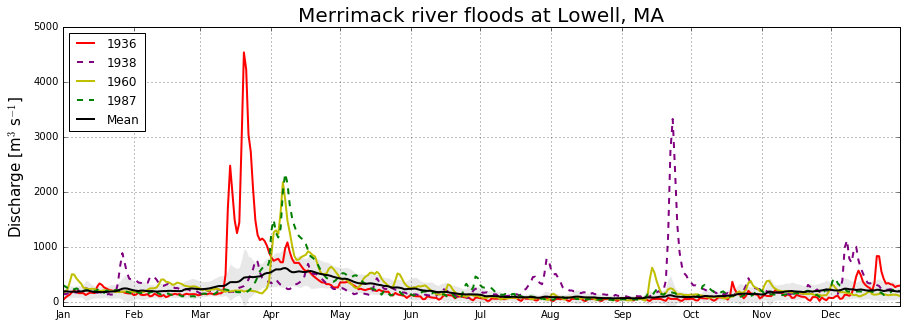

In [44]:
# Create years to plot
file1 = 'data/merrimack_discharge.dat'
a = discharge_data2(file1,'USGS')
site1,date1,dvv1,qual1 = a.dv_dt_year('1936')
site2,date2,dvv2,qual2 = a.dv_dt_year('1938')
site3,date3,dvv3,qual3 = a.dv_dt_year('1960')
site4,date4,dvv4,qual4 = a.dv_dt_year('1987')

# Calculates mean of all the years

def calculate_mean(files):
    old_val = np.zeros(shape=366)
    a = discharge_data2(files,'USGS')
    for i in range(1923,2005):
        s,d,dv,q = a.dv_dt_year(str(i))
        new_val, date_li = interp_datetime(i,d,dv)
        old_val = np.vstack((old_val,new_val))
    old_val = old_val[1:,:]
    mn = np.mean(old_val,axis=0)
    st = np.std(old_val,axis=0)
    return old_val,mn,st

old, m ,sf = calculate_mean(file1)
lower_sf = m - sf
higher_sf = m + sf

# All plotting
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)

dd1 , dtt1 = interp_datetime(2012,date1,dvv1)
ax.plot(dtt1,dd1,'-',lw=2,color='red',label='1936')
dd2 , dtt2 = interp_datetime(2012,date2,dvv2)
ax.plot(dtt2,dd2,'--',lw=2,color='purple',label='1938')
dd3 , dtt3 = interp_datetime(2012,date3,dvv3)
ax.plot(dtt3,dd3,'-y',lw=2,ms=0,label='1960')
dd4 , dtt4 = interp_datetime(2012,date4,dvv4)
ax.plot(dtt4,dd4,'--g',lw=2,label='1987')    

ax.plot(dtt4,m,'-k',lw=2,label='Mean')
ax.fill_between(dtt4,lower_sf,higher_sf,facecolor='lightgray', alpha=0.5,lw=0)


# Plot properties
ax.grid() # set dpi=100 and 1080 p
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax.set_ylabel('Discharge [m$^3$ s$^{-1}$]',fontsize=15)
ax.set_title('Merrimack river floods at Lowell, MA',fontsize=20)
ax.set_ylim(-70,5000)
ax.legend(loc='upper left')

fig.savefig('merrimack.png') 

# 2. Plot 2D function multiple ways

Use this code to define a set of gridded data, defined between -3 and 3 in both x and y.

    X, Y = np.meshgrid(np.linspace(-4.2, 6.2, 101), np.linspace(-3.2, 3.2, 101))
    Z = np.cos(X**2+Y**2)*(X**2+Y**2)**-0.25 + 0.2*X*Y*np.sin(Y) \
       + 0.01*X*Y**4*np.sin(X) + 0.2*np.exp(-Y**2)

Create three different plots of Z over the X-Y plane. Use:
* `pcolor`
* `contourf`
* `contour` (with dashed lines for negative values, solid lines for positive values)

Make sure the aspect ratio is 1.

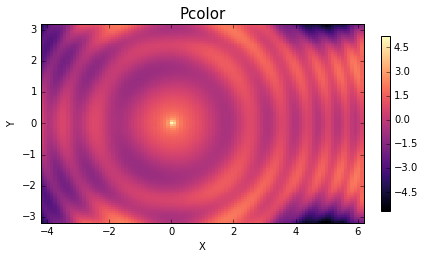

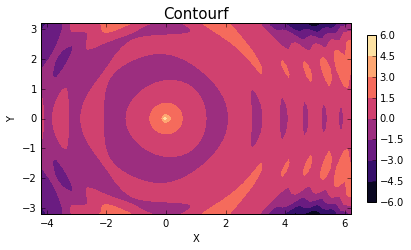

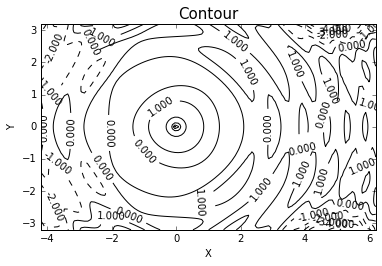

In [41]:
# Problem 2 solution:


X, Y = np.meshgrid(np.linspace(-4.2, 6.2, 101), np.linspace(-3.2, 3.2, 101))
Z = np.cos(X**2+Y**2)*(X**2+Y**2)**-0.25 + 0.2*X*Y*np.sin(Y) \
   + 0.01*X*Y**4*np.sin(X) + 0.2*np.exp(-Y**2)
    
fig = plt.figure()
ax = fig.add_subplot(111,aspect=1)
a1 = ax.pcolor(X,Y,Z,cmap='magma')
plt.colorbar(a1,fraction=0.025,pad = 0.05)
ax.set_ylim(-3.2,3.2)
ax.set_xlim(-4.2,6.2)
ax.set_title('Pcolor',fontsize=15)
ax.set_xlabel('X')
ax.set_ylabel('Y')

fig2 = plt.figure()
ax2 = fig2.add_subplot(111,aspect=1)
a2 = ax2.contourf(X,Y,Z,cmap='magma')
plt.colorbar(a2,fraction=0.025,pad = 0.05)
ax2.set_ylim(-3.2,3.2)
ax2.set_xlim(-4.2,6.2)
ax2.set_title('Contourf',fontsize=15)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')

fig3 = plt.figure()
ax3 = fig3.add_subplot(111,aspect=1)
a3 = ax3.contour(X,Y,Z,10,colors='k')
ax3.set_ylim(-3.2,3.2)
ax3.set_xlim(-4.2,6.2)
ax3.set_title('Contour',fontsize=15)
plt.clabel(a3,inline=1)
ax3.set_xlabel('X')
ax3.set_ylabel('Y')

fig.tight_layout()

# 3. Read 2D data and make scatter plot

Temperature and salinity are known to have an important relationship in oceanography. Investigate that relationship in the CTD data from one of the files stored in `data/MCH`. Read in the data and make the following plots as subplots in one figure:

1. plot temperature vs. salinity, using black dots to mark the data points.
1. plot temperature vs. salinity, and color the markers with the depth;
1. plot temperature vs. salinity, color the markers with the depth, and then size the markers with another property of your choice from the file.

Choose a colormap that is different from the default to use for the colors of your markers for the 2nd and 3rd plots.

(20.910075921421758, 22.204525421524099, 19.99915184426478, 32.036112785650651)

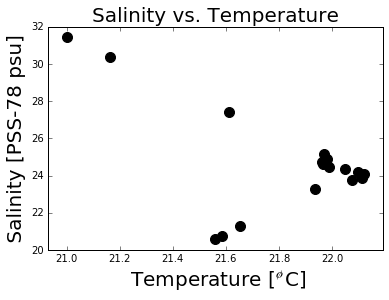

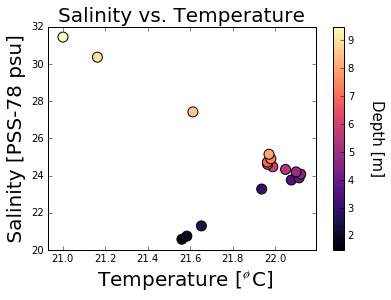

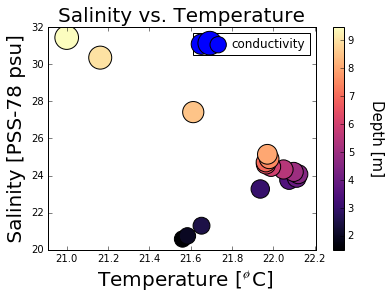

In [5]:
# Problem 3 solution:

L = glob.glob('../../pythonpractice/data_Mason/MCH/*')

data = np.loadtxt(L[0],skiprows=57)
sal=data[:,5]
temper = data[:,2]
press = data[:,0]
conduct = data[:,4]
dept = data[:,1]

# Plot to make sure arrays are filled with reasonable values
fig = plt.figure()
ax = fig.add_subplot(111)
#ax.plot(temper,sal)
ax.scatter(temper,sal,color='k',s=100)
ax.set_xlabel(' Temperature [$^\o$C]',fontsize=20)
ax.set_ylabel(' Salinity [PSS-78 psu] ',fontsize=20)
ax.set_title('Salinity vs. Temperature',fontsize=20)
ax.axis('tight')

fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
sc = ax2.scatter(temper,sal,c=dept,cmap='magma',s=100)
cbar = plt.colorbar(sc)
cbar.ax.set_ylabel('Depth [m]', rotation=270,fontsize = 15,labelpad=30)
ax2.set_xlabel(' Temperature [$^\o$C]',fontsize=20)
ax2.set_ylabel(' Salinity [PSS-78 psu] ',fontsize=20)
ax2.set_title('Salinity vs. Temperature',fontsize=20)
ax2.axis('tight')

area = np.pi * (3*conduct)**2
fig3 = plt.figure()
ax3 = fig3.add_subplot(111)
sc = ax3.scatter(temper,sal,c=dept,cmap='magma',s=area,label='conductivity')
cbar = plt.colorbar(sc)
cbar.ax.set_ylabel('Depth [m]', rotation=270,fontsize = 15,labelpad=30)
ax3.set_xlabel(' Temperature [$^\o$C]',fontsize=20)
ax3.set_ylabel(' Salinity [PSS-78 psu] ',fontsize=20)
ax3.set_title('Salinity vs. Temperature',fontsize=20)
ax3.legend()
ax3.axis('tight')

# 4. Histogram

Make a 1D histogram of wind speed from the BURL1 NOAA weather station. Load the data like this:

    burl = np.genfromtxt('http://www.ndbc.noaa.gov/view_text_file.php?filename=burl1h2010.txt.gz&dir=data/historical/stdmet/')
    wind_speed = burl[:, 6]

*Bonus*: What kind of probability distribution does this look like? Plot your best guess on top of the histogram using a line.

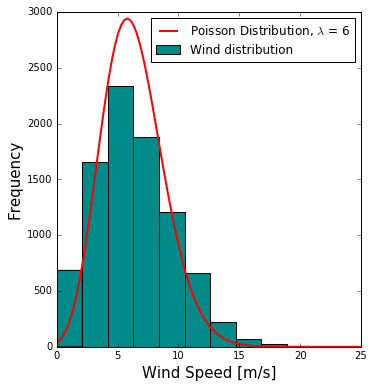

In [39]:
# Problem 4 solution

import scipy.misc
burl = np.genfromtxt('http://www.ndbc.noaa.gov/view_text_file.php?filename=burl1h2010.txt.gz&dir=data/historical/stdmet/')
wind_speed = burl[:, 6]

f = 10
hist,binns = np.histogram(wind_speed,bins=f)

fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(1, 2, 1)
ax1.hist(wind_speed, bins=f,color='darkcyan',label='Wind distribution')
ax1.set_xlabel('Wind Speed [m/s]',fontsize=15)
ax1.set_ylabel('Frequency',fontsize=15)
s = np.sum(hist*np.diff(binns))

k = np.linspace(0,25,100)
lamd = 6.3

poissons1 = lamd**k*np.exp((-1)*lamd)/scipy.misc.factorial(k)
poissons = poissons1*s
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(k,poissons, '-r',lw=2,label='Poisson Distribution, $\lambda$ = '+str(int(lamd)))


ax1.legend()

# 5. (Grad) Fit and line and plot

Load in the Mauna Loa carbon dioxide dataset:

    mauna_loa_co2 = np.genfromtxt('ftp://aftp.cmdl.noaa.gov/products/trends/co2/co2_mm_mlo.txt')
    years = mauna_loa_co2[:, 0]
    months = mauna_loa_co2[:, 1]
    co2 = mauna_loa_co2[:, 4]


Fit a 1st (straight line), 2nd, and 5th order polynomial to the data. Use your polynomial fits to predict CO$_2$ in the year 2100. Which prediction do you think is most accurate?

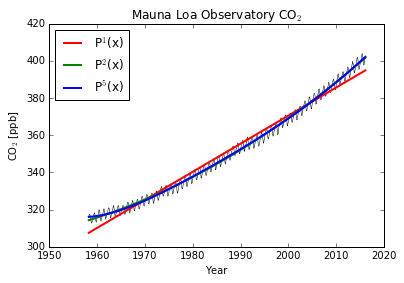

In [35]:
# Problem 5 solution

mauna_loa_co2 = np.genfromtxt('ftp://aftp.cmdl.noaa.gov/products/trends/co2/co2_mm_mlo.txt')
years = mauna_loa_co2[:, 0]
months = mauna_loa_co2[:, 1]
co2 = mauna_loa_co2[:, 4]
x = years+months/12

fig=plt.figure()
ax = fig.add_subplot(111)
ax.plot(x,co2,'k',lw=0.5)
ax.set_xlabel('Year')
ax.set_ylabel('CO$_2$ [ppb]')

p1 = np.polyfit(x, co2, 1)
ax.plot(x,p1[1]+p1[0]*x,'r',label='P$^1$(x)',lw=2)


p2 = np.polyfit(x, co2, 2)
ax.plot(x,p2[2]+p2[1]*x+p2[0]*x**2,'g',label='P$^2$(x)',lw=2)


p5 = np.polyfit(x, co2, 5)
p_y = p5[5]+p5[4]*x+p5[3]*x**2+p5[2]*x**3+p5[1]*x**4+p5[0]*x**5
ax.plot(x,p_y,'b',label='P$^5$(x)',lw=2)
ax.set_title('Mauna Loa Observatory CO$_2$')
ax.legend(loc='upper left')

### The fifth order polynomial and the second order polynomial are more accurate
### than the first order polynomial.

# 6. (Grad) Make a movie

Make a movie of annual mean surface air temperature predictions from the AR4 model. Data are found in `data/surface_temp_predictions.npz`. Load the data using

    lon, lat, mean_surf_temp = np.load('surface_temp_predictions.npz')['arr_0']

The `['arr_0']` is needed because of the way zipped `npz` files store data; see the docstring for `np.savez`. (The source for the data can be found [here](http://nomads.ncdc.noaa.gov/thredds/dodsC/gfdlcm2x/Stable2000/tas_A1.200101-210012.nc.html)).
Make sure your movie includes some representation of the earth (like coastlines), includes a colorbar, along with other appropriate labels.

The process will be to create a loop that creates a series of frames, labeled `frame_003.png`, for example. You will want to create a string for the filename using some code like this:

    frame_name = 'frame_%03d' % frame_number

Use [ffmpeg](https://www.ffmpeg.org) to stitch the frames together to create an H264 animation that can be played by quicktime. I use a command like this:

    $ ffmpeg -y -r 10 -i frames_%04d.png -c:v libx264 -pix_fmt yuv420p -crf 15 OUTFILE.mp4

where the options mean

    -y                  Overwrite old file
    
    -r 10               Play 10 frames per second
    
    -c:v libx264        Use the H264 library
    
    -crf 15             Use a compression factor of 15 (0=lossless, 51=poor.)
                        Quicktime cannot play lossless encoded movies. 15 appears to be reasonable.

    -pix_fmt yuv420p    Special command so that quicktime can play the movie.  Note, this requires
                        an even number of pixels.  If you don't have this, you can use convert to 
                        crop a pixel off edge of the image.

See [this page]https://trac.ffmpeg.org/wiki/x264EncodingGuide for more information.    

img000.png


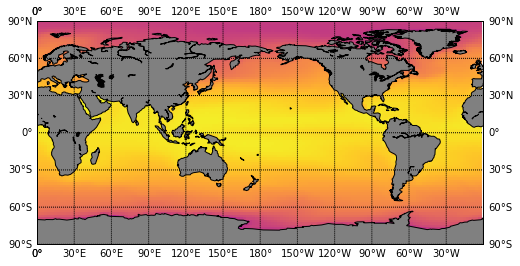

In [46]:
# Problem 6 solution

# images and movie are in the folder 'frames'.

from mpl_toolkits.basemap import Basemap
lon, lat, sst = np.load('data/surface_temp_predictions.npz', encoding='latin1')['arr_0']


for i in range(100):
    if i < 10:
        frame_name = 'img00'+str(i)+'.png'
    elif i < 100:
        frame_name = 'img0'+str(i)+'.png'
    else:
        frame_name = 'img'+str(i)+'.png'
    print(frame_name)
    m = Basemap(lat_0=0.0,lon_0=180.0)
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111)
    l=sst[i,:,:]
    ax.pcolormesh(lon,lat,l,cmap='plasma')
    m.drawcoastlines()
    m.fillcontinents(color='gray', lake_color='k')
    m.drawparallels(np.arange(-90, 91, 30), labels=[1, 1, 1, 1])
    m.drawmeridians(np.arange(-180,180,30),labels=[1,1,1,1])
    fig.savefig('frames/'+frame_name)

In [47]:
import subprocess,os
subprocess.call('ffmpeg -y -r 10 -i frames/img%03d.png -c:v libx264 -pix_fmt yuv420p frames/OUTFILE.mp4',shell=True)

0